# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv('Train.csv')
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df_test = pd.read_csv('Test.csv')
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# Data Observation

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Check Null Values :

In [7]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df_train.isnull().sum()/len(df_train)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

## Null Values Imputation

In [9]:
df_train['Outlet_Size'] = df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0])
df_test['Outlet_Size'] = df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0])

In [10]:
df_train['Item_Weight'] = df_train['Item_Weight'].fillna(df_train['Item_Weight'].median())
df_test['Item_Weight'] = df_test['Item_Weight'].fillna(df_test['Item_Weight'].median())

In [11]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Data Description

In [12]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,12.813420,4.227240,4.555,9.310000,12.600000,16.000000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [13]:
df_train.describe(include='object').T

,count,unique,top,freq
Item_Identifier,8523,1559,FDW13,10
Item_Fat_Content,8523,5,Low Fat,5089
Item_Type,8523,16,Fruits and Vegetables,1232
Outlet_Identifier,8523,10,OUT027,935
Outlet_Size,8523,3,Medium,5203
Outlet_Location_Type,8523,3,Tier 3,3350
Outlet_Type,8523,4,Supermarket Type1,5577


<AxesSubplot:>

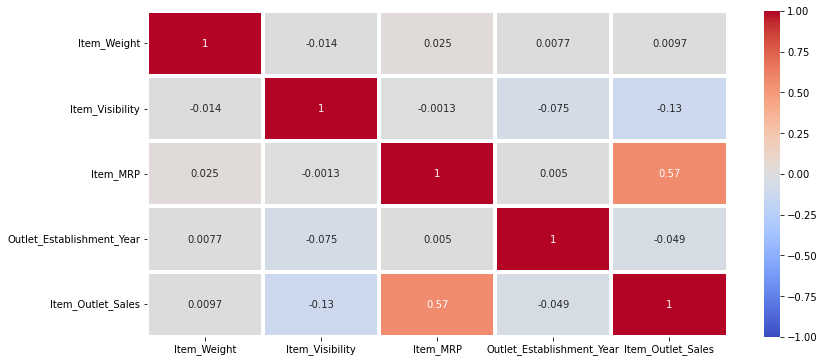

In [14]:
plt.figure(figsize=(13,6))
sns.heatmap(df_train.corr(),cmap='coolwarm',annot=True,vmax=1,vmin=-1,linewidths=4)

# Data Cleaning

In [15]:
df_train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [16]:
df_test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [17]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [18]:
df_test['Years_Established'] = df_test['Outlet_Establishment_Year'].apply(lambda x: 2021 - x) 
df_test = df_test.drop(columns=['Outlet_Establishment_Year'])

In [19]:
df_train['Years_Established'] = df_train['Outlet_Establishment_Year'].apply(lambda x: 2021 - x) 
df_train = df_train.drop(columns=['Outlet_Establishment_Year'])

In [20]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,34


### Drop unnecessary Features

In [21]:
df_train.drop(['Item_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier'],axis=1,inplace=True)

In [22]:
df_train.drop(['Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Outlet_Identifier'],axis=1,inplace=True)

# Scaling And Encoding 

## --> For Training :

In [23]:
lr = LabelEncoder()
df_train['Item_Fat_Content'] = lr.fit_transform(pd.DataFrame(df_train['Item_Fat_Content']))

df_train['Item_Type'] = lr.fit_transform(pd.DataFrame(df_train['Item_Type']))

df_train['Outlet_Size'] = lr.fit_transform(pd.DataFrame(df_train['Outlet_Size']))
df_train['Outlet_Location_Type'] = lr.fit_transform(pd.DataFrame(df_train['Outlet_Location_Type']))

In [24]:
df_train = pd.get_dummies(df_train,drop_first=True)

## --> For Training :

In [25]:
df_test['Item_Fat_Content'] = lr.fit_transform(pd.DataFrame(df_test['Item_Fat_Content']))

df_test['Item_Type'] = lr.fit_transform(pd.DataFrame(df_test['Item_Type']))

df_test['Outlet_Size'] = lr.fit_transform(pd.DataFrame(df_test['Outlet_Size']))
df_test['Outlet_Location_Type'] = lr.fit_transform(pd.DataFrame(df_test['Outlet_Location_Type']))

In [26]:
df_test = pd.get_dummies(df_test,drop_first=True)

#### Dividing In to X and y :

In [27]:
X = df_train.drop(('Item_Outlet_Sales'),axis=1)
y = df_train.Item_Outlet_Sales

# Models :-

## Function For models:

In [81]:
from sklearn.model_selection import cross_val_score
#from sklearn.metrics import neg_mean_squared_error
import statistics
from statistics import mean
def train(model,X,y):
    #train_the_model
    model.fit(X,y)
    
    #predict the model
    pred = model.predict(X)
    
    #peform Cross_validation
    cv_score = cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=10)
    #sklearn.metrics.SCORERS.keys() to see Scoring methods
    m_cv_score = np.abs(np.mean(cv_score))
    
    print("----------Model Report----------")
    print('MSE: ',mean_squared_error(y,pred))
    print('cv_Score: ',cv_score)
    #Mean of Cv_Score to get Avg Value
    print('Mean Cv_Score: ',m_cv_score)

## Linear Regression :

----------Model Report----------
MSE:  1274125.4329108146
cv_Score:  [-1357444.13020693 -1299940.40526445 -1259822.17507953 -1240168.12461972
 -1254095.43913786 -1230003.5157031  -1245600.16578822 -1296156.9679278
 -1289505.93134302 -1313743.00036238]
Mean Cv_Score:  1278647.9855433009


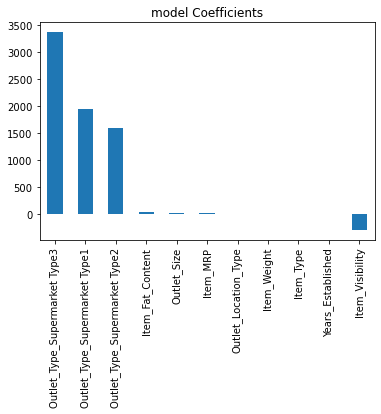

In [100]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
model = LinearRegression(normalize=True)
train(model,X,y)
coef = pd.Series(model.coef_,X.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='model Coefficients')

# save the model to disk
filename = 'LinearRegression.sav'
pickle.dump(model, open(filename, 'wb'))

## Lasso

----------Model Report----------
MSE:  1382677.699753695
cv_Score:  [-1449507.84741985 -1410721.98878492 -1347514.02931794 -1318830.90071492
 -1297048.96962419 -1315694.37938658 -1352033.306501   -1422599.61567409
 -1394337.65923417 -1433302.06879342]
Mean Cv_Score:  1374159.076545109


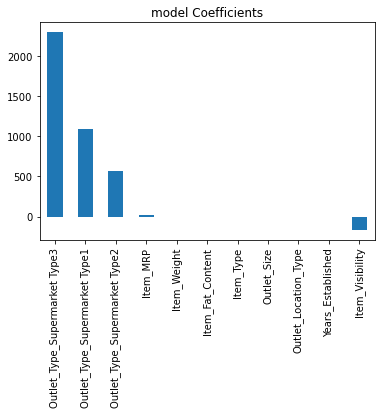

In [99]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
model = Lasso(normalize=True)
train(model,X,y)
coef = pd.Series(model.coef_,X.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='model Coefficients')

# save the model to disk
filename = 'Lasso.sav'
pickle.dump(model, open(filename, 'wb'))

## Ridge

----------Model Report----------
MSE:  1855565.5208289998
cv_Score:  [-1988167.67161808 -1958408.4683583  -1802350.87411015 -1796035.76452059
 -1627699.44368529 -1822547.70320967 -1841051.25898927 -1919607.52634217
 -1934153.34443771 -1890573.27824622]
Mean Cv_Score:  1858059.5333517424


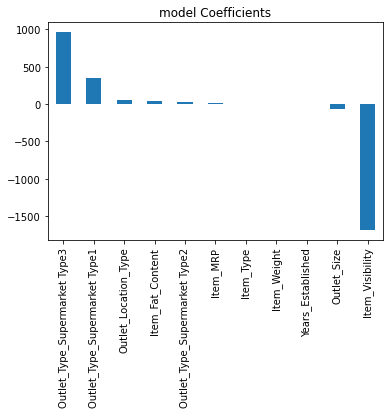

In [97]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
model = Ridge(normalize=True)
train(model,X,y)
coef = pd.Series(model.coef_,X.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='model Coefficients')
# save the model to disk
filename = 'Ridge.sav'
pickle.dump(model, open(filename, 'wb'))

##### Checking Vif For Variables...

In [29]:
def vif_score(X):
    vif_score = pd.DataFrame()
    vif_score['Ind_Features'] = X.columns
    vif_score['vif_scores']=[variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
    return vif_score


vif_score(X)

,Ind_Features,vif_scores
0,Item_Weight,9.482084
1,Item_Fat_Content,1.567384
2,Item_Visibility,2.780629
3,Item_Type,3.926814
4,Item_MRP,5.937264
5,Outlet_Size,5.639168
6,Outlet_Location_Type,5.735039
7,Years_Established,10.952798
8,Outlet_Type_Supermarket Type1,4.753913
9,Outlet_Type_Supermarket Type2,2.428750


## Feature Selection: 

In [30]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [86]:
y=y
x=df_dummy

lr=LinearRegression()

sfs= SFS(lr,k_features='best',forward=True,cv=10)
sfs.fit(x,y)
print('The features selected are : ',sfs.k_feature_names_)
print('The R2 value for the model with 5 features is :',sfs.k_score_)


The features selected are :  ('Item_Fat_Content', 'Item_MRP', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3')
The R2 value for the model with 5 features is : 0.5602768056816047


## Random Forest :

----------Model Report----------
MSE:  179596.28059379035
cv_Score:  [-1377488.66769849 -1232626.06345869 -1382761.247437   -1222597.64425289
 -1339846.65479212 -1259630.31345462 -1287150.44826781 -1305849.95090901
 -1261745.02687168 -1317062.11426558]
Mean Cv_Score:  1298675.8131407876


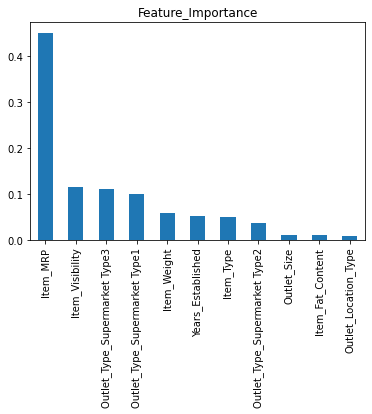

In [96]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model,X,y)
coef = pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature_Importance')
# save the model to disk
filename = 'RandomForestRegressor.sav'
pickle.dump(model, open(filename, 'wb'))


## Elastic Net Regressor:

----------Model Report----------
MSE:  1832628.2838488657
cv_Score:  [-1888439.43911053 -1913323.72882104 -1776888.23638379 -1772260.34411824
 -1703305.46604437 -1774161.63493144 -1778444.29493711 -1902227.54555225
 -1928266.34665895 -1920429.37792584]
Mean Cv_Score:  1835774.641448355


<AxesSubplot:title={'center':'Feature_Importance'}>

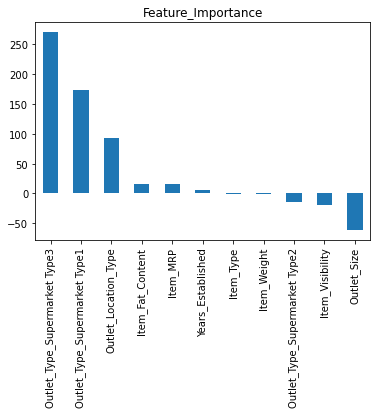

In [95]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
# save the model to disk
filename = 'ElasticNet.sav'
pickle.dump(model, open(filename, 'wb'))


train(model,X,y)
coef = pd.Series(model.coef_,X.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature_Importance')

In [35]:
df_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Years_Established,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750,0,0.007565,13,107.8622,1,0,22,1,0,0
1,8.300,1,0.038428,4,87.3198,1,1,14,1,0,0
2,14.600,0,0.099575,11,241.7538,1,2,23,0,0,0
3,7.315,0,0.015388,13,155.0340,1,1,14,1,0,0
4,12.500,1,0.118599,4,234.2300,1,2,36,0,0,1


In [36]:
x_train, x_test, y_train, y_test = train_test_split(df_dummy, y, test_size=0.2, random_state=0)

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,accuracy_score
from sklearn.metrics import r2_score
#model
regressor_rf = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)

#fit
regressor_rf.fit(x_train, y_train)

#predict
y_pred = regressor_rf.predict(x_test)

#score variables
RFR_MAE = round(mean_absolute_error(y_test, y_pred),2)
RFR_MSE = round(mean_absolute_error(y_test, y_pred),2)
RFR_R_2 = round(mean_absolute_error(y_test, y_pred),4)

print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")


 Mean Absolute Error: 788.04

 Mean Squared Error: 788.04

 R^2 Score: 788.0389



# Final Model For Pickle

In [89]:
model_rf = RandomForestRegressor()

In [90]:
RF_model_full = model_rf.fit(X , y)

In [92]:
import pickle

In [93]:
pickle.dump(RF_model_full,open('model.pkl','wb'))

# Conclusion: